# Data Modeling

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess data
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Modeling
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Measure performance
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score

In [2]:
df = pd.read_pickle("./saved-items/df.pkl")

df.head()

,Text,language,Cleaned_Text
0,sebes joseph pereira thomas på eng the jesuit...,Swedish,sebes joseph pereira thomas på eng the jesuits...
1,de spons behoort tot het geslacht haliclona en...,Dutch,de spons behoort tot het geslacht haliclona en...
2,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish,tsutinalar i̇ngilizce tsuutina kanadada albert...
3,kemunculan pertamanya adalah ketika mencium ka...,Indonesian,kemunculan pertamanya adalah ketika mencium ka...
4,association de recherche et de sauvegarde de l...,French,association de recherche et de sauvegarde de l...


In [3]:
df.language.value_counts()

Indonesian    1000
Romanian      1000
French        1000
Spanish       1000
Swedish       1000
Arabic        1000
Russian       1000
Turkish       1000
Dutch         1000
English       1000
Name: language, dtype: int64

## Split the Data

We will split the data into a training set and a testing set. The proportions will be 70% training and 30% test set.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df.Cleaned_Text, df.language, test_size=0.3, random_state=42, 
    shuffle=True, stratify=df.language
)

# List of Algorithms To Try
- k-Nearest Neighbors
- Naive Bayes
- Random Forest

## K-Nearest Neighbors

In [5]:
knn_pipeline = Pipeline([
    ('vector', CountVectorizer()),
    ('knn', KNeighborsClassifier(weights='distance'))
])

In [6]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vector', CountVectorizer()),
                ('knn', KNeighborsClassifier(weights='distance'))])

In [7]:
y_train_pred = cross_val_predict(knn_pipeline, X_train, y_train, cv=5)

pd.DataFrame(confusion_matrix(y_train, y_train_pred), columns=knn_pipeline.classes_, index=knn_pipeline.classes_)

,Arabic,Dutch,English,French,Indonesian,Romanian,Russian,Spanish,Swedish,Turkish
Arabic,408,0,0,1,0,0,290,0,0,1
Dutch,0,656,0,10,0,1,24,8,0,1
English,0,1,610,0,1,9,68,2,0,9
French,0,0,3,640,0,5,31,21,0,0
Indonesian,0,0,5,2,530,2,160,1,0,0
Romanian,0,0,2,7,0,635,46,8,0,2
Russian,0,0,1,0,0,1,698,0,0,0
Spanish,0,0,2,19,0,4,27,648,0,0
Swedish,0,2,2,2,0,1,54,0,639,0
Turkish,0,0,4,5,0,5,271,5,0,410


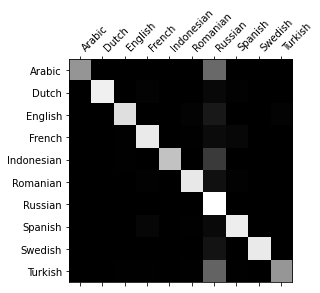

In [8]:
conf_mat = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.xticks(ticks=np.arange(10), labels=knn_pipeline.classes_, rotation=45, ha='left')
plt.yticks(ticks=np.arange(10), labels=knn_pipeline.classes_)
plt.show()

In [9]:
# F1 Score
knn_f1_score = f1_score(y_train, y_train_pred, average='macro')

## Multinomial Naive Bayes

In [10]:
naive_pipeline = Pipeline([
    ('vector', CountVectorizer()),
    ('naive_bayes', MultinomialNB(alpha=0.01))
])

In [11]:
naive_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vector', CountVectorizer()),
                ('naive_bayes', MultinomialNB(alpha=0.01))])

In [12]:
y_train_pred = cross_val_predict(naive_pipeline, X_train, y_train, cv=5)

pd.DataFrame(confusion_matrix(y_train, y_train_pred), columns=naive_pipeline.classes_, index=naive_pipeline.classes_)

,Arabic,Dutch,English,French,Indonesian,Romanian,Russian,Spanish,Swedish,Turkish
Arabic,696,0,2,1,0,0,0,0,1,0
Dutch,0,690,1,8,0,1,0,0,0,0
English,0,0,698,0,1,0,0,0,0,1
French,0,0,5,693,0,0,0,2,0,0
Indonesian,0,0,10,0,690,0,0,0,0,0
Romanian,0,0,8,1,0,691,0,0,0,0
Russian,0,0,4,1,0,0,695,0,0,0
Spanish,0,0,9,2,0,0,0,689,0,0
Swedish,0,0,0,0,0,0,0,0,700,0
Turkish,0,0,8,0,0,0,0,0,0,692


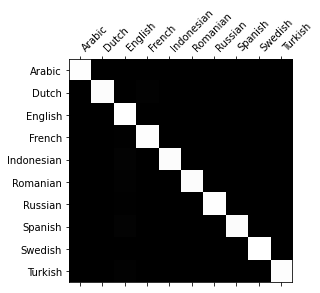

In [13]:
conf_mat = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.xticks(ticks=np.arange(10), labels=naive_pipeline.classes_, rotation=45, ha='left')
plt.yticks(ticks=np.arange(10), labels=naive_pipeline.classes_)
plt.show()

In [14]:
# F1 Score
naive_f1_score = f1_score(y_train, y_train_pred, average='macro')

## Random Forest

In [15]:
forest_pipeline = Pipeline([
    ('vector', CountVectorizer()),
    ('forest', RandomForestClassifier(n_estimators=50, criterion='entropy', 
                                      min_samples_split=6, max_features='log2', bootstrap=False))
])

In [16]:
forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vector', CountVectorizer()),
                ('forest',
                 RandomForestClassifier(bootstrap=False, criterion='entropy',
                                        max_features='log2',
                                        min_samples_split=6,
                                        n_estimators=50))])

In [17]:
y_train_pred = cross_val_predict(forest_pipeline, X_train, y_train, cv=5)

pd.DataFrame(confusion_matrix(y_train, y_train_pred), 
             columns=forest_pipeline.classes_, index=forest_pipeline.classes_)

,Arabic,Dutch,English,French,Indonesian,Romanian,Russian,Spanish,Swedish,Turkish
Arabic,694,0,2,2,0,0,2,0,0,0
Dutch,0,685,1,12,0,1,1,0,0,0
English,0,0,697,0,1,0,1,0,0,1
French,0,1,4,694,0,0,0,1,0,0
Indonesian,0,0,10,0,689,0,1,0,0,0
Romanian,0,0,8,1,0,690,1,0,0,0
Russian,0,0,4,0,0,0,696,0,0,0
Spanish,0,1,8,2,0,0,3,686,0,0
Swedish,0,0,0,0,0,0,0,0,700,0
Turkish,0,0,9,0,0,0,2,0,0,689


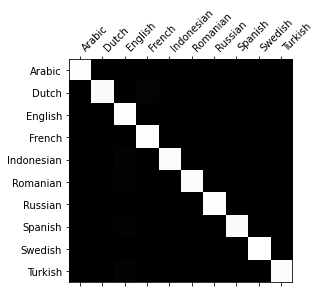

In [18]:
conf_mat = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.xticks(ticks=np.arange(10), labels=forest_pipeline.classes_, rotation=45, ha='left')
plt.yticks(ticks=np.arange(10), labels=forest_pipeline.classes_)
plt.show()

In [19]:
# F1 Score
forest_f1_score = f1_score(y_train, y_train_pred, average='macro')

# F1 Score for Each Algorithm

In [20]:
f1_scores = {
    'K Nearest Neighbots': [knn_f1_score],
    'Multinomial Naive Bayes': [naive_f1_score],
    'Random Forest': [forest_f1_score]
}

pd.DataFrame(f1_scores, index=['Macro F1 Score'])

,K Nearest Neighbots,Multinomial Naive Bayes,Random Forest
Macro F1 Score,0.854051,0.990661,0.988653


In [21]:
print(f'The algorithm with the highest F1 score is {list(f1_scores.keys())[np.argmax(list(f1_scores.values()))]}.')

The algorithm with the highest F1 score is Multinomial Naive Bayes.


## Naive Bayes Performed the Best
Now we can test the model on the test set.

In [22]:
y_test_pred = naive_pipeline.predict(X_test)

pd.DataFrame(confusion_matrix(y_test, y_test_pred), columns=naive_pipeline.classes_, index=naive_pipeline.classes_)

,Arabic,Dutch,English,French,Indonesian,Romanian,Russian,Spanish,Swedish,Turkish
Arabic,299,0,0,1,0,0,0,0,0,0
Dutch,1,299,0,0,0,0,0,0,0,0
English,0,0,300,0,0,0,0,0,0,0
French,0,0,0,300,0,0,0,0,0,0
Indonesian,0,0,6,0,294,0,0,0,0,0
Romanian,0,0,3,0,1,296,0,0,0,0
Russian,0,0,2,0,0,0,298,0,0,0
Spanish,0,1,2,1,0,0,0,296,0,0
Swedish,0,0,2,0,0,0,0,0,298,0
Turkish,0,1,3,0,0,0,0,0,0,296


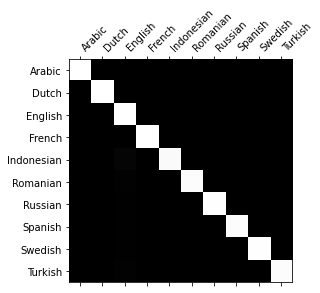

In [23]:
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.xticks(ticks=np.arange(10), labels=naive_pipeline.classes_, rotation=45, ha='left')
plt.yticks(ticks=np.arange(10), labels=naive_pipeline.classes_)
plt.show()

In [24]:
test_f1_score = f1_score(y_test, y_test_pred, average='macro')

print(f'The F1 score of the Naive Bayes classifier on the test set is {round(test_f1_score, 4)}')

The F1 score of the Naive Bayes classifier on the test set is 0.9921


# Save the trained model as a pickle object

In [25]:
# save the model
filename = './saved-items/naive_bayes.sav'
pickle.dump(naive_pipeline, open(filename, 'wb'))

# save the list of languages
langs = naive_pipeline.classes_
pickle.dump(langs, open('./saved-items/languages.sav', 'wb'))